# PARTIE 1 : Prétraitement & nettoyage

# Lecture des données

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [52]:
pd.set_option('display.max_columns', 200)
data = pd.read_csv('./src/Speed+Dating+Data.csv', encoding='Latin-1')
display(data.head())
data.shape

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

(8378, 195)

# Champs inutiles

In [53]:
all_columns = data.columns
print(len(all_columns))
all_columns.values

195


array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [54]:
# Nous identifions et retirons les champs qui ne sont pas utiles pour notre étude 
# (informations redondantes et/ou non pertinentes)
useless_columns = ['id','idg','partner','field','from','zipcode','career']
data.drop(useless_columns, axis=1, inplace=True)
data.shape

(8378, 188)

# Lignes erronées

In [55]:
# Nous identifions 10 lignes erronées dans le jeu de données (valeur pid NaN)
# -> Nous retirons ces lignes
data = data[np.isnan(data.pid) != True]
data = data.reset_index(drop=True)
data.shape

(8368, 188)

# Colonnes avec données manquantes

In [56]:
missing_values = data.isna().sum()/data.shape[0]*100
missing_values_df = missing_values.to_frame().reset_index()
missing_values_df.rename(columns={'index': 'column_name', 0: 'missing_values'}, inplace=True)
missing_values_df.sort_values(by='missing_values', ascending=False).head()

,column_name,missing_values
153,num_in_3,92.041109
152,numdat_3,82.122371
61,expnum,78.608987
119,amb7_2,76.637189
116,sinc7_2,76.637189


In [57]:
# Visualisation avec Plotly Express
mask = missing_values_df[missing_values_df['missing_values'] > 20]
fig = px.bar(y=mask['column_name'], 
                x=mask['missing_values'],
                title='Columns where missing values exceed 20%', 
                labels={'x':'proportion of missing values (%)', 'y': 'columns'},
                orientation = 'h', height=600)
#fig.add_vline(x=20)
fig.update_layout(title_x=.5,
                  title_font_size=18,
                  xaxis_title_font_size=15,
                  yaxis_title_font_size=15,
                  font=dict(size=7))
fig.update_xaxes(tickfont_size=11)
fig.show()

In [58]:
# Liste des champs avec plus de 20% de valeurs manquantes
missing_values_columns = mask['column_name'].values
print(len(missing_values_columns))
missing_values_columns

90


array(['positin1', 'undergra', 'mn_sat', 'tuition', 'income', 'expnum',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s',
       'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s',
       'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2',
       'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2',
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2',
       'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3',
       'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3',
       'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3',
       'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3',
       'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3',
       'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3'

In [59]:
to_remove = missing_values_columns.tolist()
data_clean_mv = data.copy()
data_clean_mv.drop(to_remove, axis=1, inplace=True)
data_clean_mv.shape

(8368, 98)

In [60]:
missing_values = data_clean_mv.isna().sum()/data_clean_mv.shape[0]*100
missing_values_df = missing_values.to_frame().reset_index()
missing_values_df.rename(columns={'index': 'column_name', 0: 'missing_values'}, inplace=True)
missing_values_df.sort_values(by='missing_values', ascending=False).head(30)

,column_name,missing_values
83,match_es,14.017686
25,shar_o,12.739006
79,shar,12.739006
86,numdat_2,11.281071
87,attr1_2,11.137667
89,intel1_2,10.922562
84,satis_2,10.922562
85,length,10.922562
88,sinc1_2,10.922562
97,amb3_2,10.922562


# Valeurs erronées

Erreurs relevées : 
- Nous remarquons des valeurs erronées pour les champs *attr_o*, *fun_o* (valeurs devant être comprises entre 1 et 10)  

- De même que pour les champs *reading* et *gaming* (valeurs devant être comprises entre 1 et 10)  

- Ainsi que pour les champs *met* et *met_o* (valeurs devant être égales à 1 ou 2)

In [61]:
data_clean_mv.describe(include='all')

,iid,gender,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
count,8368.000000,8368.00000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8210.000000,8368.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8368.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8274.000000,8286.000000,8305.000000,8289.000000,8289.000000,8289.000000,8271.000000,8289.000000,8230.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8267.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8289.000000,8289.000000,8289.000000,8289.000000,8280.000000,8280.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8368.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,7195.000000,7454.000000,7454.000000,7424.000000,7436.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000
mean,283.863767,0.50000,1.829828,11.358509,16.880258,9.048757,8.931764,283.863767,0.164914,0.196300,0.396272,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.420053,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.364999,7.665339,2.756653,3.785981,3.653879,2.121848,5.007375,2.158523,5.277886,6.424418,4.574255,6.244300,7.783448,6.987453,6.716371,5.737483,3.880565,5.745325,7.680058,5.304379,6.778140,7.920618,6.824587,7.850887,5.631077,4.338038,5.534051,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,30.361422,13.264852,14.417394,18.427955,11.744583,11.855626,7.084352,8.295776,7.704345,8.404454,7.577877,0.420053,6.190350,7.175256,7.369301,6.400474,6.778409,5.474870,6.134498,5.208251,0.947579,3.206991,5.711833,1.843708,2.337823,26.197823,15.872299,17.817152,17.656897,9.918161,12.762388,7.124497,7.931983,8.238664,7.601959,7.486048
std,158.584899,0.50003,0.375806,5.995461,4.354579,5.515476,5.478099,158.584899,0.371125,0.303522,0.489151,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493597,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.563648,3.759695,1.230689,2.846506,2.805641,1.406983,1.444439,1.105428,3.309885,2.619419,2.801521,2.419612,1.755105,2.051600,2.262518,2.570595,2.621188,2.502831,2.004806,2.529580,2.233341,1.700264,2.156155,1.792227,2.609472,2.717712,1.733627,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,16.252894,6.964893,6.265235,6.577442,6.888958,6.169747,1.395527,1.407226,1.564041,1.076268,1.778718,0.493597,1.950178,1.740575,1.550501,1.953816,1.794080,2.156163,1.841258,2.129354,0.989878,2.444377,1.821610,0.975682,0.631340,14.371856,6.657147,6.535516,6.124525,5.675667,6.652739,1.371758,1.503184,1.180390,1.548276,1.744980
min,1.000000,0.00000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000

In [62]:
# Vérification des valeurs attr_o 
# -> Nous avons une valeur attr_o qui vaut 10.5
data_clean_mv['attr_o'].value_counts()

attr_o
6.0     1655
7.0     1642
5.0     1260
8.0     1230
4.0      748
9.0      540
3.0      390
10.0     324
2.0      244
1.0      108
0.0        8
6.5        7
7.5        3
9.5        3
8.5        1
9.9        1
10.5       1
3.5        1
Name: count, dtype: int64

In [63]:
# Ici il s'agit d'une erreur de saisie
# -> Nous pouvons retrouver la valeur correcte en regardant la fiche du partenaire (où attr=10)
print("Subject's score card: ")
display(data_clean_mv[data_clean_mv['attr_o'] == 10.5].iloc[:, np.r_[0:1,7:8,20:26,74:80]])
print("Partner's score card: ")
display(data_clean_mv[(data_clean_mv['pid']==404.0) & (data_clean_mv['iid']==383)].iloc[:, np.r_[0:1,7:8,20:26,74:80]])

Subject's score card: 


,iid,pid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr,sinc,intel,fun,amb,shar
6206,404,383.0,10.5,9.0,7.0,7.0,NaN,NaN,8.0,7.0,6.0,5.0,6.0,NaN


Partner's score card: 


,iid,pid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr,sinc,intel,fun,amb,shar
5817,383,404.0,8.0,7.0,6.0,5.0,6.0,NaN,10.0,9.0,7.0,7.0,NaN,NaN


In [64]:
# Application de la correction
new_value = 10
data_clean_mv.loc[6216, 'attr_o'] = new_value

In [65]:
# Vérification des valeurs fun_o
# -> Nous avons une valeur fun_o qui vaut 11
data_clean_mv['fun_o'].value_counts()

fun_o
7.0     1657
6.0     1529
8.0     1453
5.0     1157
4.0      605
9.0      600
10.0     386
3.0      281
2.0      220
1.0      107
0.0       14
5.5        2
6.5        2
7.5        2
9.5        1
8.5        1
11.0       1
Name: count, dtype: int64

In [66]:
# Ici il s'agit d'une erreur de saisie
# -> Nous pouvons retrouver la valeur correcte en regardant la fiche du partenaire (où fun=10)
print("Subject's score card: ")
display(data_clean_mv[data_clean_mv['fun_o'] == 11].iloc[:, np.r_[0:1,7:8,20:26,74:80]])
print("Partner's score card: ")
display(data_clean_mv[(data_clean_mv['pid']==436.0) & (data_clean_mv['iid']==440)].iloc[:, np.r_[0:1,7:8,20:26,74:80]])

Subject's score card: 


,iid,pid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr,sinc,intel,fun,amb,shar
6598,436,440.0,10.0,10.0,10.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Partner's score card: 


,iid,pid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr,sinc,intel,fun,amb,shar
6660,440,436.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [67]:
# Application de la correction
new_value = 10
data_clean_mv.loc[6608, 'fun_o'] = new_value

In [68]:
# Vérification des valeurs met et met_o
# -> Nous trouvons des valeurs supérieures à 2
print(data_clean_mv['met'].value_counts())
print(data_clean_mv['met_o'].value_counts())

met
0.0    4047
2.0    3588
1.0     350
7.0       3
5.0       2
3.0       1
8.0       1
6.0       1
Name: count, dtype: int64
met_o
2.0    7635
1.0     350
7.0       3
5.0       2
3.0       1
6.0       1
8.0       1
Name: count, dtype: int64


In [69]:
# Nous supposons qu'il s'agit d'erreurs de saisie
# -> Nous corrigeons avec la valeur met_o ou met correspondante

print('Errors met values:')
met_errors = data_clean_mv[data_clean_mv['met'] > 2]
display(met_errors.iloc[:, np.r_[28:29,82:83]])

print('Errors met_o values:')
met_o_errors = data_clean_mv[data_clean_mv['met_o'] > 2]
met_o_errors.iloc[:, np.r_[28:29,82:83]]

Errors met values:


,met_o,met
826,2.0,3.0
1072,2.0,5.0
2414,1.0,7.0
2415,2.0,8.0
2481,2.0,6.0
2856,1.0,7.0
6657,2.0,7.0
7517,2.0,5.0


Errors met_o values:


,met_o,met
989,3.0,2.0
1515,5.0,2.0
2536,6.0,2.0
2559,7.0,1.0
2569,8.0,2.0
3370,7.0,1.0
6556,7.0,2.0
8043,5.0,0.0


In [70]:
# Application de la correction pour met
new_value_1 = met_errors[met_errors['met_o'] == 1.0].index
new_value_2 = met_errors[met_errors['met_o'] == 2.0].index

for i in new_value_1:
    data_clean_mv.loc[i, 'met'] = 1.0
for i in new_value_2:
    data_clean_mv.loc[i, 'met'] = 2.0

In [71]:
# Application de la correction pour met_o
new_value_1 = met_o_errors[met_o_errors['met'] == 1.0].index
new_value_2 = met_o_errors[(met_o_errors['met'] == 2.0) | (met_o_errors['met'] == 0)].index

for i in new_value_1:
    data_clean_mv.loc[i, 'met_o'] = 1.0
for i in new_value_2:
    data_clean_mv.loc[i, 'met_o'] = 2.0

In [72]:
# Vérification des valeurs reading et gaming
# -> Nous trouvons les valeurs erronées 13 et 14
print(data_clean_mv['gaming'].value_counts())
print(data_clean_mv['reading'].value_counts())

gaming
1.0     1982
2.0     1173
3.0     1078
5.0     1021
6.0      759
7.0      733
4.0      710
8.0      429
9.0      220
14.0      78
0.0       59
10.0      47
Name: count, dtype: int64
reading
9.0     1998
8.0     1616
10.0    1377
7.0     1273
6.0      766
5.0      571
3.0      246
4.0      222
2.0      160
13.0      51
1.0        9
Name: count, dtype: int64


In [73]:
display(data_clean_mv[data_clean_mv['gaming'] == 14].iloc[:, np.r_[:, 0:2, 38:55]].groupby('iid').min())
display(data_clean_mv[data_clean_mv['reading'] == 13].iloc[:, np.r_[:, 0:2, 38:55]].groupby('iid').min())

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
iid,,,,,,,,,,,,,,,,,,
142,0,5.0,6.0,6.0,6.0,5.0,5.0,6.0,14.0,7.0,6.0,6.0,6.0,6.0,6.0,8.0,6.0,6.0
240,0,10.0,10.0,9.0,10.0,10.0,8.0,9.0,14.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,3.0
285,1,5.0,7.0,6.0,10.0,9.0,10.0,9.0,14.0,5.0,9.0,7.0,3.0,10.0,10.0,10.0,10.0,10.0
441,1,6.0,1.0,6.0,7.0,7.0,8.0,7.0,14.0,9.0,9.0,8.0,9.0,10.0,10.0,10.0,7.0,2.0
544,1,3.0,4.0,3.0,10.0,7.0,8.0,5.0,14.0,9.0,2.0,10.0,7.0,8.0,8.0,9.0,10.0,3.0


,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
iid,,,,,,,,,,,,,,,,,,
216,1,2.0,1.0,2.0,7.0,7.0,5.0,3.0,5.0,1.0,13.0,6.0,6.0,7.0,6.0,5.0,2.0,1.0
244,1,5.0,2.0,10.0,8.0,6.0,4.0,9.0,1.0,3.0,13.0,9.0,8.0,9.0,3.0,4.0,3.0,1.0
523,0,8.0,1.0,5.0,9.0,4.0,3.0,6.0,7.0,8.0,13.0,5.0,2.0,7.0,8.0,9.0,3.0,1.0


In [74]:
# Ici nous assumons qu'il s'agit d'erreurs de saisie
# Étant donné que nous sommes incertains sur la valeur réelle, nous choisissons de les remplacer par la médiane
gaming_rows_to_correct = data_clean_mv[data_clean_mv['gaming'] == 14].index
reading_rows_to_correct = data_clean_mv[data_clean_mv['reading'] == 13].index

gaming_median = data_clean_mv.groupby('iid').max()['gaming'].median()
reading_median = data_clean_mv.groupby('iid').max()['reading'].median()

for i in gaming_rows_to_correct:
    data_clean_mv.loc[i, 'gaming'] = gaming_median
    
for i in reading_rows_to_correct:
    data_clean_mv.loc[i, 'reading'] = reading_median

# Valeurs aberrantes (outliers)

In [75]:
data_clean_mv.describe(include='all')

,iid,gender,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
count,8368.000000,8368.00000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8210.000000,8368.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8368.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8274.000000,8286.000000,8305.000000,8289.000000,8289.000000,8289.000000,8271.000000,8289.000000,8230.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8267.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8289.000000,8289.000000,8289.000000,8289.000000,8280.000000,8280.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8368.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,7195.000000,7454.000000,7454.000000,7424.000000,7436.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000,7454.000000
mean,283.863767,0.50000,1.829828,11.358509,16.880258,9.048757,8.931764,283.863767,0.164914,0.196300,0.396272,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.420053,6.190779,7.175256,7.369301,6.400973,6.778409,5.474870,6.134498,5.208251,1.955961,26.364999,7.665339,2.756653,3.785981,3.653879,2.121848,5.007375,2.158523,5.277886,6.424418,4.574255,6.244300,7.783448,6.987453,6.716371,5.737483,3.777054,5.745325,7.649294,5.304379,6.778140,7.920618,6.824587,7.850887,5.631077,4.338038,5.534051,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,30.361422,13.264852,14.417394,18.427955,11.744583,11.855626,7.084352,8.295776,7.704345,8.404454,7.577877,0.420053,6.190350,7.175256,7.369301,6.400474,6.778409,5.474870,6.134498,5.208251,0.943325,3.206991,5.711833,1.843708,2.337823,26.197823,15.872299,17.817152,17.656897,9.918161,12.762388,7.124497,7.931983,8.238664,7.601959,7.486048
std,158.584899,0.50003,0.375806,5.995461,4.354579,5.515476,5.478099,158.584899,0.371125,0.303522,0.489151,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493597,1.950740,1.740575,1.550501,1.954480,1.794080,2.156163,1.841258,2.129354,0.205194,3.563648,3.759695,1.230689,2.846506,2.805641,1.406983,1.444439,1.105428,3.309885,2.619419,2.801521,2.419612,1.755105,2.051600,2.262518,2.570595,2.429707,2.502831,1.960810,2.529580,2.233341,1.700264,2.156155,1.792227,2.609472,2.717712,1.733627,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,16.252894,6.964893,6.265235,6.577442,6.888958,6.169747,1.395527,1.407226,1.564041,1.076268,1.778718,0.493597,1.950178,1.740575,1.550501,1.953816,1.794080,2.156163,1.841258,2.129354,0.976150,2.444377,1.821610,0.975682,0.631340,14.371856,6.657147,6.535516,6.124525,5.675667,6.652739,1.371758,1.503184,1.180390,1.548276,1.744980
min,1.000000,0.00000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000

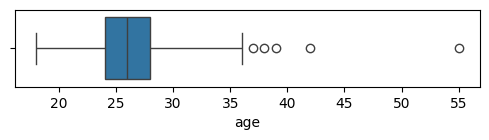

In [76]:
# Nous remarquons des valeurs aberrantes parmi les âges des participants
# Avec une moyenne de 26 ans, les valeurs au-dessus de 36 ans sont considérés comme des outliers
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 1))
sns.boxplot(x=data_clean_mv.groupby('iid').max()['age'], ax=ax, whis=2)
plt.show()

In [77]:
data_clean_mv.groupby('iid').max()['age'].mean()

26.359116022099446

In [78]:
# Cela concerne 5 participants
data_clean_mv.groupby('age')['iid'].nunique()

age
18.0     1
19.0     2
20.0     5
21.0    22
22.0    44
23.0    56
24.0    56
25.0    55
26.0    55
27.0    68
28.0    47
29.0    40
30.0    36
31.0     7
32.0    13
33.0    12
34.0    11
35.0     4
36.0     4
37.0     1
38.0     1
39.0     1
42.0     1
55.0     1
Name: iid, dtype: int64

In [79]:
# Dans le cas de l'étude présente nous considérons ces données comme aberrantes
# --> Nous les supprimons
data_clean_outliers = data_clean_mv.copy()

outliers = data_clean_outliers[data_clean_outliers['age'] > 36].index.tolist()
outliers_o = data_clean_outliers[data_clean_outliers['age_o'] > 36].index.tolist()

data_clean_outliers.drop(outliers, axis=0, inplace=True)
data_clean_outliers.drop(outliers_o, axis=0, inplace=True)

data_clean_outliers.shape

(8232, 98)

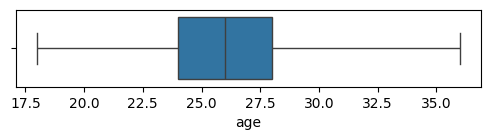

In [80]:
# Visualisation avec Seaborn
fig, ax = plt.subplots(figsize=(6, 1))
sns.boxplot(x=data_clean_outliers.groupby('iid').max()['age'], ax=ax, whis=2)
plt.show()

# Normalisation des notes

Deux échelles de notation ont été utilisées pour évaluer les préférences personnelles (attr, sinc, etc.) : 
- Allocation de 100 points
- Note de 1 à 10.   

Afin de pouvoir être comparées, nous devons mettre les préférences sur la même échelle.

Tout d'abord, recherchons quelles échelles ont été utilisées pour chaque préférence.

Pour ce faire, nous calculons les totaux de chaque groupe de préférences : 
- Les totaux max de 100 points suggèrent l'utilisation d'une allocation de 100 points
- Les totaux max ne dépassant pas 50 points suggèrent l'utilisation d'une l'échelle de 1 à 10 


In [81]:
# Calcul des totaux des préférences
data_clean_scores = data_clean_outliers.copy()

data_clean_scores['sum_pf_o'] = data_clean_scores[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']].sum(axis=1)
data_clean_scores['sum1_1'] = data_clean_scores[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].sum(axis=1)
data_clean_scores['sum2_1'] = data_clean_scores[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].sum(axis=1)
data_clean_scores['sum1_2'] = data_clean_scores[['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']].sum(axis=1)
data_clean_scores['sum3_1'] = data_clean_scores[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].sum(axis=1)
data_clean_scores['sum3_2'] = data_clean_scores[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].sum(axis=1)

In [82]:
data_clean_scores.describe(include='all').iloc[:, np.r_[98:104]]

,sum_pf_o,sum1_1,sum2_1,sum1_2,sum3_1,sum3_2
count,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000
mean,99.107513,99.107513,99.101376,89.407640,38.600097,34.275753
std,9.955209,9.955209,9.862545,31.125713,6.392096,12.797556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,100.000000,100.000000,36.000000,34.000000
50%,100.000000,100.000000,100.000000,100.000000,39.000000,38.000000
75%,100.000000,100.000000,100.000000,100.000000,42.000000,41.000000
max,148.000000,148.000000,112.000000,120.000000,50.000000,50.000000


Résultats : 

- *attr1_1*, *attr_2_1*, *attr1_2* sont notées par allocation de 100 points :  
il s'agit des préférences du participant pour les différentes qualités, cette échelle de notation est pertinente et nous la conservons

- *attr3_1*, *attr3_2* sont notées sur une échelle de 1 à 10 :  
il s'agit de l'évaluation du participant sur sa propre personne, cette échelle de notation est pertinente et nous la conservons

Toutefois nous remarquons des erreurs puisque certains totaux dépassent largement les 100 points.  

Nous corrigeons ces erreurs :

In [83]:
# Vérification des totaux dans le groupe de préférence 1 (attr1_1, sinc1_1, etc.)
data_clean_scores['sum1_1'].value_counts().sort_index(ascending=False)

sum1_1
148.00      10
120.00      25
110.00      22
101.00      10
100.02      90
100.02      54
100.01     237
100.01     126
100.00     107
100.00    7031
100.00      35
99.99      197
99.99       81
99.99       16
99.98       26
95.00       22
90.00       65
0.00        78
Name: count, dtype: int64

In [84]:
# Ici il s'agit d'erreurs de saisie (53 à la place de 5, 21 à la place de 20)
# --> Nous corrigeons ces erreurs de saisie
data_clean_scores[(data_clean_scores['sum1_1'] == 148) | (data_clean_scores['sum1_1'] == 101)].iloc[:, np.r_[0:1,56:62,99:100]].groupby('iid').max()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,sum1_1
iid,,,,,,,
66,20.0,25.0,15.0,15.0,53.0,20.0,148.0
68,21.0,17.0,22.0,20.0,8.0,13.0,101.0


In [85]:
# Ici il s'agit d'une erreur dans le total des points distribués
# --> Nous remettons les notes sur une échelle de 100 points
data_clean_scores[(data_clean_scores['sum1_1'] == 120) | (data_clean_scores['sum1_1'] == 110) | (data_clean_scores['sum1_1'] == 95) | (data_clean_scores['sum1_1'] == 90)].iloc[:, np.r_[0:1,56:62,99:100]].groupby('iid').max()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,sum1_1
iid,,,,,,,
44,25.0,15.0,25.0,25.0,15.0,15.0,120.0
67,20.0,15.0,20.0,20.0,5.0,10.0,90.0
105,30.0,15.0,20.0,20.0,0.0,5.0,90.0
427,20.0,20.0,20.0,20.0,20.0,20.0,120.0
489,20.0,10.0,20.0,20.0,20.0,0.0,90.0
517,15.0,20.0,20.0,20.0,5.0,10.0,90.0
518,20.0,25.0,25.0,30.0,5.0,5.0,110.0
526,10.0,10.0,30.0,20.0,10.0,15.0,95.0


Nous effectuons les mêmes vérifications pour les autres groupes de préférences et nous appliquons toutes les corrections nécessaires :

In [86]:
# Application des corrections pour tous les groupes de préférences

# ------- Correction des erreurs de saisie -------

pref_scores_to_correct_1 = data_clean_scores[data_clean_scores['sum1_1'] == 148].index.tolist()
for i in pref_scores_to_correct_1:
    data_clean_scores.loc[i, 'amb1_1'] = 5.0

pref_scores_to_correct_2 = data_clean_scores[data_clean_scores['sum1_1'] == 101].index.tolist()
for i in pref_scores_to_correct_2:
    data_clean_scores.loc[i, 'attr1_1'] = 20.0

pref_scores_to_correct_3 = data_clean_scores[data_clean_scores['sum2_1'] == 101].index.tolist()
for i in pref_scores_to_correct_3:
    data_clean_scores.loc[i, 'sinc2_1'] = 20.0

pref_scores_to_correct_4 = data_clean_scores[data_clean_scores['sum_pf_o'] == 148].index.tolist()
for i in pref_scores_to_correct_4:
    data_clean_scores.loc[i, 'pf_o_amb'] = 5.0

pref_scores_to_correct_5 = data_clean_scores[data_clean_scores['sum_pf_o'] == 101].index.tolist()
for i in pref_scores_to_correct_5:
    data_clean_scores.loc[i, 'pf_o_att'] = 20.0

# ------- Remise à l'échelle sur 100 points --------
    
def rescale_pref_scores(data, pref_columns, sum_column, divisor):
    ''' This function rescales the scores on 100 points '''
    for pref in pref_columns:
        pref_scores_to_correct = data[data[sum_column] == divisor].index.tolist()
        for i in pref_scores_to_correct:
            data.loc[i, pref] = data.loc[i, pref] * 100 / divisor

pref1_1 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
pref2_1 = ["attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1"]
pref1_2 = ["attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]
pref_o = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha"]

rescale_pref_scores(data_clean_scores, pref1_1, 'sum1_1', 120)
rescale_pref_scores(data_clean_scores, pref1_1, 'sum1_1', 110)
rescale_pref_scores(data_clean_scores, pref1_1, 'sum1_1', 95)
rescale_pref_scores(data_clean_scores, pref1_1, 'sum1_1', 90)

rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 112)
rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 110)
rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 105)
rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 95)
rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 90)
rescale_pref_scores(data_clean_scores, pref2_1, 'sum2_1', 80)

rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 120)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 115)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 110)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 105)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 103)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 102)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 99)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 95)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 90)
rescale_pref_scores(data_clean_scores, pref1_2, 'sum1_2', 80)

rescale_pref_scores(data_clean_scores, pref_o, 'sum_pf_o', 120)
rescale_pref_scores(data_clean_scores, pref_o, 'sum_pf_o', 110)
rescale_pref_scores(data_clean_scores, pref_o, 'sum_pf_o', 95)
rescale_pref_scores(data_clean_scores, pref_o, 'sum_pf_o', 90)

In [87]:
to_drop = ['sum_pf_o','sum1_1','sum2_1','sum3_1','sum1_2','sum3_2']
data_clean_scores.drop(to_drop, axis=1, inplace=True)

In [88]:
# Nous calculons les nouveaux totaux après correction
data_clean_scores['sum_pf_o'] = data_clean_scores[['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']].sum(axis=1)
data_clean_scores['sum1_1'] = data_clean_scores[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].sum(axis=1)
data_clean_scores['sum2_1'] = data_clean_scores[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].sum(axis=1)
data_clean_scores['sum1_2'] = data_clean_scores[['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']].sum(axis=1)
data_clean_scores['sum3_1'] = data_clean_scores[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].sum(axis=1)
data_clean_scores['sum3_2'] = data_clean_scores[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].sum(axis=1)

In [89]:
data_clean_scores.describe(include='all').iloc[:, np.r_[98:104]]

,sum_pf_o,sum1_1,sum2_1,sum1_2,sum3_1,sum3_2
count,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000
mean,99.052849,99.052849,99.053150,89.261867,38.600097,34.275753
std,9.688473,9.688473,9.688503,30.962350,6.392096,12.797556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,100.000000,100.000000,36.000000,34.000000
50%,100.000000,100.000000,100.000000,100.000000,39.000000,38.000000
75%,100.000000,100.000000,100.000000,100.000000,42.000000,41.000000
max,100.020000,100.020000,100.030000,100.020000,50.000000,50.000000


In [90]:
to_drop = ['sum_pf_o','sum1_1','sum2_1','sum3_1','sum1_2','sum3_2']
data_clean_final = data_clean_scores.copy()
data_clean_final.drop(to_drop, axis=1, inplace=True)
data_clean_final.shape

(8232, 98)

# Correction des échelles

Nous remarquons que les échelles de notation pour les champs *date* et *go_out* sont inversées :  la plus petite valeur pour le plus actif, la plus grande valeur pour le moins actif. 

Les corriger facilitera la recherche de corrélations dans la partie 3 de ce projet.  

Dans la même optique nous pouvons améliorer l'échelle de notation du champ *goal*, en classant les objectifs du moins déterminé au plus déterminé.

In [91]:
to_correct = ['date', 'go_out']
for col in to_correct:
    data_clean_final[col] = data_clean_final[col].apply( 
                                lambda x : 7.0 if x == 1.0
                                else 6.0 if x == 2.0
                                else 5.0 if x == 3.0
                                else 3.0 if x == 5.0
                                else 2.0 if x == 6.0
                                else 1.0 if x == 7.0
                                else x
                                )

In [92]:
data_clean_final['goal'] = data_clean_final['goal'].apply( 
                            lambda x : 1.0 if x == 6.0
                            else 2.0 if x == 5.0
                            else 6.0 if x == 4.0
                            else 5.0 if x == 3.0
                            else 4.0 if x == 2.0
                            else 3.0 if x == 1.0
                            else x
                            )

# Observations avec données manquantes

## Suppression de lignes

- Une ligne est une observation. Chaque ligne représente une fiche remplie par un participant à l'issue du speed dating

- Bien que nous ayons retiré les colonnes ayant une part élevée de données manquantes, certaines lignes comportent encore beaucoup de champs vides. Cette proportion atteint 79% dans le pire des cas

In [93]:
# Pourcentage de valeurs manquantes par lignes
missing_values_in_rows = (data_clean_final.isna().sum(axis=1)/data_clean_final.shape[1]*100).to_frame()
missing_values_in_rows.sort_values(by=0,ascending=False).head(10)

,0
845,79.591837
847,79.591837
843,79.591837
842,79.591837
839,79.591837
838,78.571429
324,66.326531
1857,62.244898
841,62.244898
844,61.224490


Nous dénombrons 140 lignes avec plus de 20% de données manquantes, soit 1.70% des données. 

Il s'agit d'une part relativement faible du jeu de données total.  

--> Nous supprimons ces lignes afin de ne garder uniquement des lignes avec moins de 20% de champs vides.

In [94]:
rows_to_remove = missing_values_in_rows[missing_values_in_rows[0] > 20]
rows_to_remove.sort_values(by=0,ascending=False)

,0
845,79.591837
843,79.591837
842,79.591837
839,79.591837
847,79.591837
...,...
6387,20.408163
2906,20.408163
6388,20.408163
2915,20.408163


Nous devons supprimer les lignes complémentaires afin de ne pas avoir de décalage pour l'analyse en partie 2 de cette étude.

In [95]:
# Nous recherchons les lignes complémentaires à supprimer
data_clean_final = data_clean_final.reset_index()
to_remove = rows_to_remove.index.values.tolist()
to_remove_df = data_clean_final.iloc[to_remove,:]
iid_list = to_remove_df['iid'].values.tolist()
pid_list = to_remove_df['pid'].values.tolist()

index_list = []
for iid, pid in zip(iid_list, pid_list):
    index_list.append(data_clean_final[(data_clean_final['iid']==pid) & (data_clean_final['pid']==iid)].index[0])

In [96]:
index_to_remove = rows_to_remove.index.values.tolist()
index_to_remove += index_list
data_clean_final = data_clean_final.drop(index_to_remove, axis=0)
data_clean_final.reset_index(drop=True)
data_clean_final.drop(['index'], axis=1, inplace=True)
data_clean_final.shape

(7964, 98)

## Imputation des données manquantes

- Les scores de préférence sont considérés comme des données essentielles dans l'étude présente  
-> nous les conservons comme tels sans imputation

- Nous appliquons une imputation sur les autres données

In [97]:
# Nous identifions les colonnes avec le plus de valeurs manquantes
(data_clean_final.isna().sum()/data_clean_scores.shape[0]*100).sort_values(ascending=False).head(20)

match_es    13.483965
shar        12.159864
shar_o      12.159864
numdat_2    10.544218
attr1_2     10.386297
intel1_2    10.179786
satis_2     10.179786
length      10.179786
sinc1_2     10.179786
amb3_2      10.179786
fun1_2      10.179786
amb1_2      10.179786
shar1_2     10.179786
attr3_2     10.179786
fun3_2      10.179786
sinc3_2     10.179786
intel3_2    10.179786
amb_o        8.017493
amb          8.017493
met          4.142371
dtype: float64

In [98]:
# Affichage de la liste totale des colonnes concernées
missing_values_df = (data_clean_final.isna().sum()/data_clean_final.shape[0]*100).to_frame()
missing_values_df[missing_values_df[0] > 0].index

Index(['int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age',
       'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es',
       'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2',
       'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2',
       'fun3_2', 'amb3_2'],
      dtype='object

Nous définissons la méthode d'imputation des données manquantes :

- Le mode pour les données catégorielles

- La moyenne pour les données quantitatives continues

- La médiane pour les données quantitatives discrètes

- Pour certaines données, nous assumons qu'il s'agit d'une réponse négative ou nulle dès lors qu'elles ne sont pas renseignées :  
like, prob, match_es, satis_2, met

In [99]:
# Ajout du champ match_es_r pour calculer le nombre de match expéré en valeur relative
data_clean_final['match_es_r'] = np.minimum(data_clean_final['match_es']/data['round']*100, 100)

In [100]:
# Choix des méthodes d'imputation pour chaque champ

by_mode = ['race', 'race_o', 'field_cd', 'date', 'career_c', 'length', 'numdat_2']
by_mean = ['int_corr', 'match_es_r']
by_mean_round = ['age_o', 'age']
by_median = ['imprace', 'imprelig', 'exphappy', 'satis_2',
              'sports', 'tvsports', 'exercise', 'dining','museums', 'art', 'hiking', 'gaming', 
              'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
by_zero = ['like_o', 'prob_o', 'like', 'prob']
by_two = ['met_o', 'met']

In [101]:
# Application des imputations
data_clean = data_clean_final.copy()

for col in by_mode:
    mode_val = data_clean.groupby('iid').max()[col].mode()[0]
    data_clean[col] = data_clean[col].fillna(mode_val)

for col in by_mean:
    mean_val = data_clean[col].mean()
    data_clean[col] = data_clean[col].fillna(mean_val)

for col in by_mean_round:
    mean_val = data_clean.groupby('iid').max()[col].mean()
    data_clean[col] = data_clean[col].fillna(round(mean_val))

for col in by_median:
    median_val = data_clean.groupby('iid').max()[col].median()
    data_clean[col] = data_clean[col].fillna(median_val)

for col in by_zero:
    data_clean[col] = data_clean[col].fillna(0)

for col in by_two:
    data_clean[col] = data_clean[col].fillna(2)

In [102]:
# Vérification après imputation
missing_values_df = (data_clean.isna().sum()/data_clean_scores.shape[0]*100).to_frame()
columns_without_mv = missing_values_df[missing_values_df[0] == 0].index
columns_with_mv = missing_values_df[missing_values_df[0] > 0].index

print(f'1) Columns without missing values after imputation: {len(columns_without_mv)} \n')
print(columns_without_mv)
print(f'\n2) Columns that still have missing values (preferences scores): {len(columns_with_mv)} \n')
print(columns_with_mv)

1) Columns without missing values after imputation: 50 

Index(['iid', 'gender', 'condtn', 'wave', 'round', 'position', 'order', 'pid',
       'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'dec_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig',
       'date', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'dec', 'like', 'prob', 'met', 'satis_2', 'length',
       'numdat_2', 'match_es_r'],
      dtype='object')

2) Columns that still have missing values (preferences scores): 49 

Index(['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'goal',
       'go_out', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
    

In [103]:
data_clean.describe(include='all')

,iid,gender,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,match_es_r
count,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7924.000000,7924.000000,7924.000000,7915.000000,7906.000000,7884.000000,7964.000000,7785.000000,7713.000000,7700.000000,7659.000000,7304.00000,6963.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7924.000000,7964.000000,7924.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7964.000000,7924.000000,7924.000000,7924.000000,7915.000000,7906.000000,7884.000000,7924.000000,7924.000000,7924.000000,7924.000000,7915.000000,7915.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7964.000000,7785.000000,7713.000000,7700.000000,7659.000000,7304.00000,6963.000000,7964.000000,7964.000000,7964.000000,6854.000000,7964.000000,7964.000000,7964.000000,7109.000000,7126.000000,7126.000000,7126.00000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7964.000000
mean,284.513310,0.500000,1.831743,11.387996,16.895530,9.073832,8.943621,284.513310,0.165244,0.194619,0.395028,26.270844,2.780889,22.443131,17.419560,20.269719,17.424695,10.663709,11.883570,0.418508,6.175389,7.159017,7.360649,6.399465,6.77437,5.464096,5.961728,5.028692,1.956429,26.217353,7.642265,2.760799,3.779633,3.661602,3.451666,2.997489,5.857017,5.228403,6.445756,4.578980,6.251507,7.807007,6.982170,6.706429,5.731793,3.777624,5.751758,7.651683,5.296082,6.764817,7.918257,6.821447,7.841411,5.637117,4.329357,5.521597,22.443131,17.419560,20.269719,17.424695,10.663709,11.883570,30.333417,13.267618,14.443982,18.385351,11.751721,11.845391,7.086213,8.298645,7.709710,8.413597,7.575516,0.418508,6.174939,7.159017,7.360649,6.398942,6.77437,5.464096,5.961728,5.028692,0.975515,3.222717,5.729282,1.757534,2.410347,26.177172,15.857460,17.790569,17.56748,9.906301,12.763983,7.124333,7.937693,8.243334,7.593882,7.490177,20.905422
std,158.796091,0.500031,0.374118,6.007228,4.338223,5.525921,5.474034,158.796091,0.371424,0.303636,0.488887,3.315523,1.254236,12.529495,7.071042,6.817184,6.082324,5.928411,6.343081,0.493345,1.954206,1.744981,1.549377,1.955485,1.79415,2.156260,2.066148,2.295339,0.204152,3.270753,3.751910,1.234387,2.842782,2.804193,1.012760,1.440866,1.102760,3.321365,2.605348,2.796486,2.404348,1.720169,2.040143,2.255823,2.565703,2.431303,2.486438,1.955160,2.526212,2.231838,1.689876,2.160114,1.793030,2.600227,2.718190,1.729667,12.529495,7.071042,6.817184,6.082324,5.928411,6.343081,16.282924,6.985425,6.272354,6.565583,6.909752,6.158987,1.406236,1.410381,1.572079,1.078214,1.781908,0.493345,1.953614,1.744981,1.549377,1.954790,1.79415,2.156260,2.066148,2.295339,0.977727,2.460367,1.722648,0.958828,0.631441,14.426043,6.642497,6.501613,6.09809,5.624022,6.627344,1.380762,1.500331,1.182448,1.556004,1.743512,17.017103
min,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.730000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,18.00000

In [104]:
data_clean.shape

(7964, 99)

# Export csv

In [106]:
data_clean.to_csv('./src/speed_dating_clean.csv', index=False)